<a href="https://colab.research.google.com/github/malcolmrite-dsi/WSB_Stock_Screener/blob/main/Reddit_Stock_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [1]:
!pip install praw

     |████████████████████████████████| 163kB 6.8MB/s 
     |████████████████████████████████| 204kB 17.9MB/s 


Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/



*   PRAW:  Python Reddit API Wrapper, allows easy access to Reddit Data
*   Pandas: To handle the data from the scraping in well formatted tables
*   datetime: To convert the raw date format into an understandable format



In [2]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


# Getting the Data from Reddit

Function Definitions









In [3]:
def authorise_extractor(twofactorcode):
    #Initialising the credentials for the API
    reddit = praw.Reddit(client_id='1h1Pkh53dcBSLA', \
                             client_secret='Lm4-BO2A5GpHoYnzEUEMMLOoH1TpIw', \
                             user_agent='Reddit_Stock by u/Get_Rich_Bot', \
                             username='Get_Rich_Bot', \
                             password= f'B+4H-5yww=<QJUV:{twofactorcode}')
    return reddit
    
    
def test_extractor(self):
    #Testing if the authorisation worked
    #For Reference: https://praw.readthedocs.io/en/latest/getting_started/quick_start.html
    print(self.read_only)
    
    # assume you have a reddit instance bound to variable `reddit`
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    
    #Validate that the subreddit extractor is working
    print(subreddit.display_name)
    print(subreddit.title)
    print(self.user.me())
    
    #Getting example submissions from the subreddit
    for submission in subreddit.top(limit=15):
        print(submission.title)  # Output: the submission's title
        print(submission.score)  # Output: the submission's score
        print(submission.id)     # Output: the submission's ID
        print(submission.url)    # Output: the URL the submission points to
                                # or the submission's URL if it's a self post

#For Reference: https://www.storybench.org/how-to-scrape-reddit-with-python/
def get_date(created):
        return dt.datetime.fromtimestamp(created)
    
#Returns a dataframe of the top reddit posts from WSB
def extract_top_data(self, posts):
    #Setting the subreddit to wallstreetbets
    subreddit = self.subreddit("wallstreetbets")
    #Create a dictionary to store the data   
                                
    topics_dict = { "title":[], \
                    "score":[], \
                    "id":[], \
                    "url":[], \
                    "comms_num": [], \
                    "created": [], \
                    "body":[]}
    
    #Extract the top posts with an upper limit defined by the user
    top_subreddit = subreddit.top(limit=posts)
    
    #Extract the relevant data from the subreddit
    for submission in top_subreddit:
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        topics_dict["body"].append(submission.selftext)
        
    topics_data = pd.DataFrame(topics_dict)
    
    _timestamp = topics_data["created"].apply(get_date)
    topics_data = topics_data.assign(timestamp = _timestamp)

    return topics_data

## Officially Getting the Data

In [4]:
reddit = authorise_extractor("729210")

train_data = extract_top_data(reddit, 300)

print(train_data.head())

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  ...           timestamp
0                             Times Square right now  ... 2021-01-31 02:00:38
1             UPVOTE so everyone sees we got SUPPORT  ... 2021-01-28 21:40:34
2                      GME YOLO update — Jan 28 2021  ... 2021-01-29 05:06:23
3               GME YOLO month-end update — Jan 2021  ... 2021-01-30 05:04:45
4  CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...  ... 2021-01-28 21:49:11

[5 rows x 8 columns]


In [5]:
train_data

,title,score,id,url,comms_num,created,body,timestamp
0,Times Square right now,371168,l8rf4k,https://v.redd.it/x64z70f7eie61,11942,1.612058e+09,,2021-01-31 02:00:38
1,UPVOTE so everyone sees we got SUPPORT,300582,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12765,1.611870e+09,,2021-01-28 21:40:34
2,GME YOLO update — Jan 28 2021,268568,l78uct,https://i.redd.it/opzucppb15e61.png,24159,1.611897e+09,,2021-01-29 05:06:23
3,GME YOLO month-end update — Jan 2021,242469,l846a1,https://i.redd.it/r557em3t5ce61.png,20997,1.611983e+09,,2021-01-30 05:04:45
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217222,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18538,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11
...,...,...,...,...,...,...,...,...
295,It really do be like that doe,44540,j8zfc6,https://i.redd.it/5tyg8qmnees51.jpg,286,1.602421e+09,,2020-10-11 13:04:53
296,On. Serious note: respect the decisions of dee...,44469,lcb614,https://www.reddit.com/r/wallstreetbets/commen...,2296,1.612456e+09,"As we all know, the most likely outcome has ha...",2021-02-04 16:22:37
297,Economic Scarcity 🤔💰,44387,gnc045,https://i.redd.it/otnbffgkgxz41.jpg,849,1.590013e+09,,2020-05-20 22:09:35
298,My gf and I are holding GME from South Korea. ...,44353,l6yqt8,https://v.redd.it/luey3zdj73e61,979,1.611875e+09,,2021-01-28 22:56:52


# Exploratory Data Analysis

In [6]:
train_data.describe()

,score,comms_num,created
count,300.000000,300.000000,3.000000e+02
mean,87870.360000,4436.793333,1.610396e+09
std,45876.307216,8353.722209,7.137953e+06
min,44204.000000,286.000000,1.554177e+09
25%,55469.250000,1316.500000,1.611876e+09
50%,72855.000000,2452.500000,1.611977e+09
75%,103700.000000,4497.250000,1.612217e+09
max,371168.000000,82009.000000,1.612607e+09


In [7]:
train_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
timestamp    datetime64[ns]
dtype: object

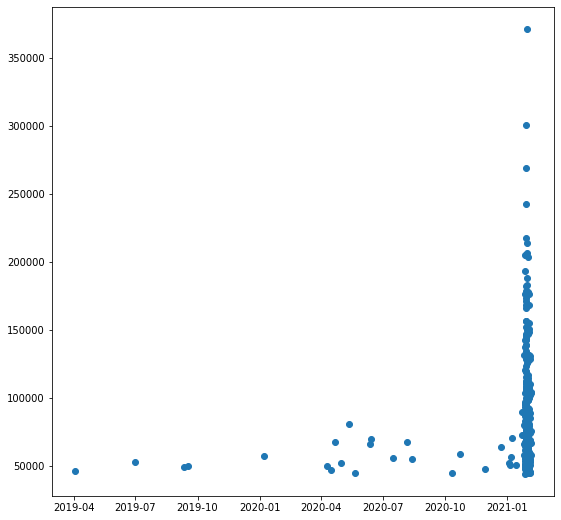

In [8]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.score)
plt.show()

# Text Extraction

In [9]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=f2530d77a6d36b1d01497cad5b257a36d1df3ed3cc8ce7fe7a92081e5312ac10
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Importing Text Blob: https://textblob.readthedocs.io/en/dev/quickstart.html

In [10]:
from textblob import TextBlob
import nltk
from pandas_datareader import data
import yfinance

In [11]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

## Function Declarations

In [23]:
def get_text_blob(title):
  header = TextBlob(title)
  return len(header.noun_phrases)

def get_subjectivity(title):
  header = TextBlob(title)
  sentiment = header.sentiment.subjectivity
  return sentiment

def get_stock_name(title):
  header = TextBlob(title)
  for word in header.words:
    try:
      data = yfinance.Ticker(noun)
      stock = data.info["symbol"]
      break

    except:
      stock = "NA" 
  
  return stock

def get_sentiment(title):
  header = TextBlob(title)
  sentiment = header.sentiment.polarity
  return sentiment

## EDA

In [13]:
header = TextBlob(train_data.iloc[3,0])

In [14]:
header.noun_phrases

WordList(['gme yolo', 'month-end update —', 'jan'])

In [15]:
for sentence in header.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [16]:
for noun in header.noun_phrases:
    print(noun)

gme yolo
month-end update —
jan


For Reference: pypi.org/project/yfinance/

## Feature Engineering

In [17]:
_count= train_data["title"].apply(get_text_blob)
train_data = train_data.assign(keyword_count = _count)

train_data.head()

,title,score,id,url,comms_num,created,body,timestamp,keyword_count
0,Times Square right now,371168,l8rf4k,https://v.redd.it/x64z70f7eie61,11942,1.612058e+09,,2021-01-31 02:00:38,0
1,UPVOTE so everyone sees we got SUPPORT,300582,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12765,1.611870e+09,,2021-01-28 21:40:34,2
2,GME YOLO update — Jan 28 2021,268568,l78uct,https://i.redd.it/opzucppb15e61.png,24159,1.611897e+09,,2021-01-29 05:06:23,3
3,GME YOLO month-end update — Jan 2021,242469,l846a1,https://i.redd.it/r557em3t5ce61.png,20997,1.611983e+09,,2021-01-30 05:04:45,3
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217222,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18538,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11,7


In [18]:
_sentiment = train_data["title"].apply(get_sentiment)
train_data = train_data.assign(sentiment = _sentiment)

train_data.head()

,title,score,id,url,comms_num,created,body,timestamp,keyword_count,sentiment
0,Times Square right now,371168,l8rf4k,https://v.redd.it/x64z70f7eie61,11942,1.612058e+09,,2021-01-31 02:00:38,0,0.285714
1,UPVOTE so everyone sees we got SUPPORT,300582,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12765,1.611870e+09,,2021-01-28 21:40:34,2,0.000000
2,GME YOLO update — Jan 28 2021,268568,l78uct,https://i.redd.it/opzucppb15e61.png,24159,1.611897e+09,,2021-01-29 05:06:23,3,0.000000
3,GME YOLO month-end update — Jan 2021,242469,l846a1,https://i.redd.it/r557em3t5ce61.png,20997,1.611983e+09,,2021-01-30 05:04:45,3,0.000000
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217222,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18538,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11,7,0.072596


In [24]:
_subjectivity = train_data["title"].apply(get_subjectivity)
train_data = train_data.assign(subjectivity = _subjectivity)

train_data.head()

,title,score,id,url,comms_num,created,body,timestamp,keyword_count,sentiment,subjectivity
0,Times Square right now,371168,l8rf4k,https://v.redd.it/x64z70f7eie61,11942,1.612058e+09,,2021-01-31 02:00:38,0,0.285714,0.535714
1,UPVOTE so everyone sees we got SUPPORT,300582,l6wu59,https://i.redd.it/sgoqy8nyt2e61.png,12765,1.611870e+09,,2021-01-28 21:40:34,2,0.000000,0.000000
2,GME YOLO update — Jan 28 2021,268568,l78uct,https://i.redd.it/opzucppb15e61.png,24159,1.611897e+09,,2021-01-29 05:06:23,3,0.000000,0.000000
3,GME YOLO month-end update — Jan 2021,242469,l846a1,https://i.redd.it/r557em3t5ce61.png,20997,1.611983e+09,,2021-01-30 05:04:45,3,0.000000,0.000000
4,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,217222,l6x130,https://www.reddit.com/r/wallstreetbets/commen...,18538,1.611871e+09,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-28 21:49:11,7,0.072596,0.432372


# More EDA

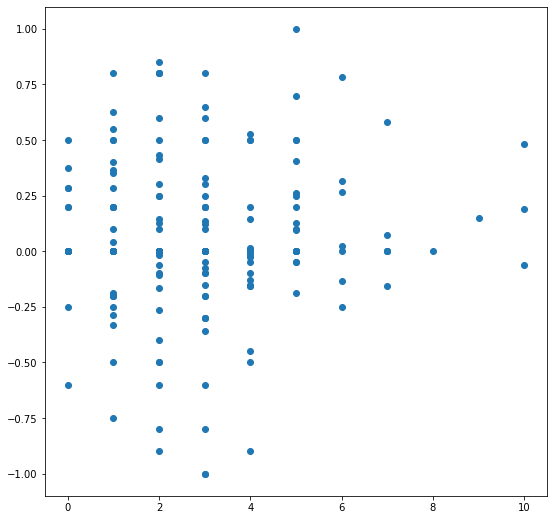

In [20]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.keyword_count, train_data.sentiment)
plt.show()

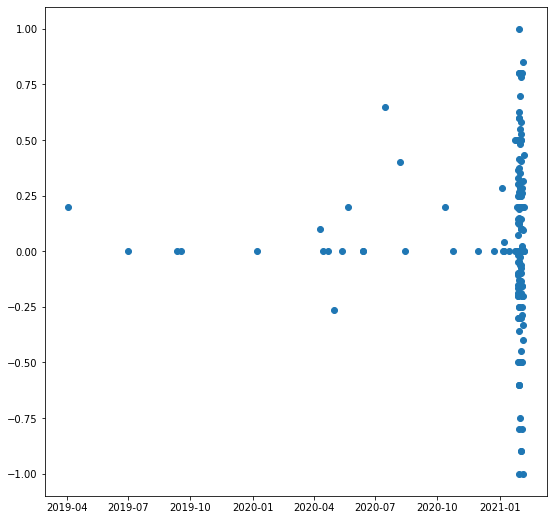

In [21]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.sentiment)
plt.show()

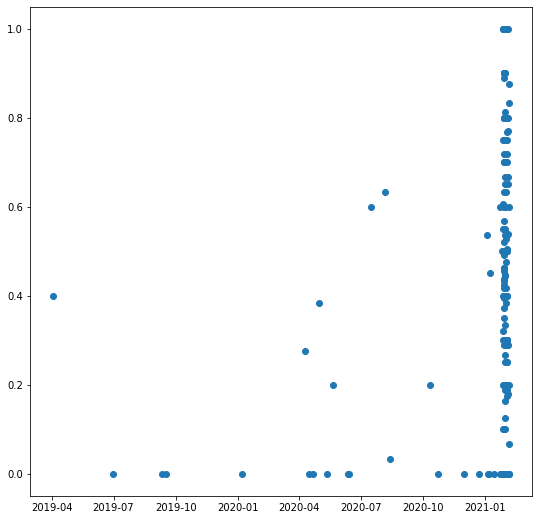

In [25]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.subjectivity)
plt.show()

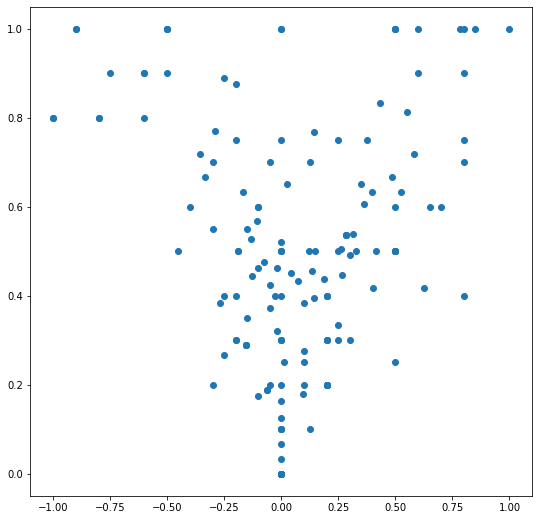

In [27]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.sentiment, train_data.subjectivity)
plt.show()

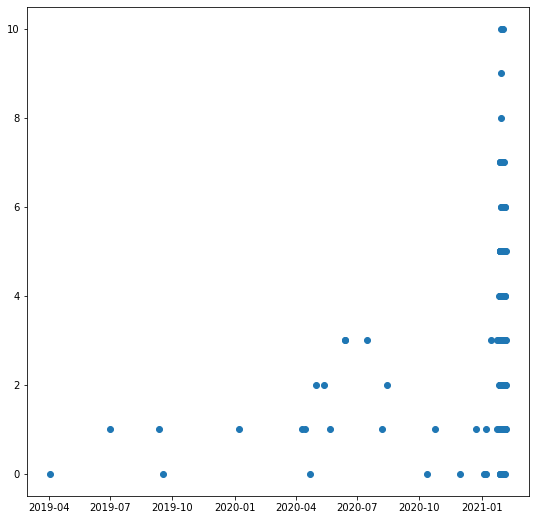

In [22]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.keyword_count)
plt.show()

In [26]:
train_data.describe()

,score,comms_num,created,keyword_count,sentiment,subjectivity
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000
mean,87870.360000,4436.793333,1.610396e+09,2.423333,0.033555,0.264894
std,45876.307216,8353.722209,7.137953e+06,1.873273,0.276808,0.322668
min,44204.000000,286.000000,1.554177e+09,0.000000,-1.000000,0.000000
25%,55469.250000,1316.500000,1.611876e+09,1.000000,0.000000,0.000000
50%,72855.000000,2452.500000,1.611977e+09,2.000000,0.000000,0.016667
75%,103700.000000,4497.250000,1.612217e+09,3.000000,0.003125,0.500000
max,371168.000000,82009.000000,1.612607e+09,10.000000,1.000000,1.000000


# Some K-Means Clustering

### Importing the Libraries : https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1



In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Scaling the Data

In [42]:
scaler = MinMaxScaler()
data = train_data.iloc[:,8:]

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


### The Clustering

In [45]:
Kmean = KMeans(n_clusters=3)

Kmean.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
Kmean.cluster_centers_

array([[0.41125   , 0.56150263, 0.38881991],
       [0.17484663, 0.50072853, 0.01878834],
       [0.19824561, 0.49990019, 0.79473936]])

In [34]:
Kmean.labels_

array([0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], d

In [35]:
from mpl_toolkits import mplot3d

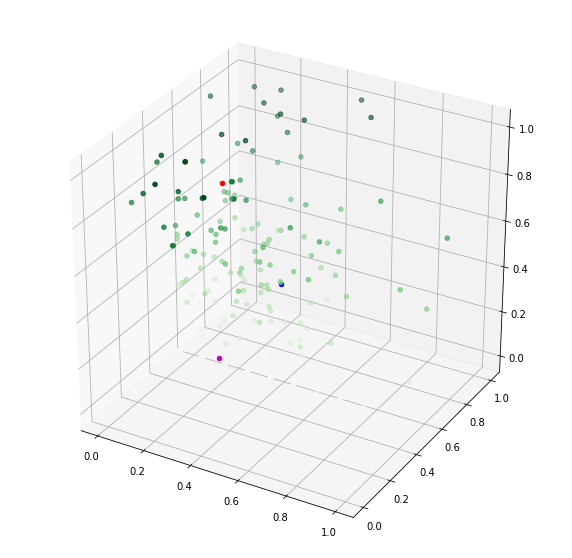

In [47]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

#Data for three-dimensional scattered points
ax.scatter3D(data_scaled.iloc[:,0], data_scaled.iloc[:,1], data_scaled.iloc[:,2], c=data_scaled.iloc[:,2], cmap='Greens')
ax.scatter3D(0.41125   , 0.56150263, 0.38881991, c='b')
ax.scatter3D(0.17484663, 0.50072853, 0.01878834, c='m')
ax.scatter3D(0.19824561, 0.49990019, 0.79473936, c='r')

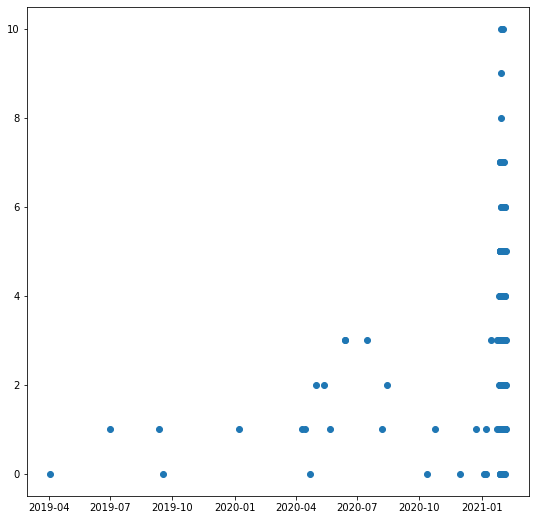

In [48]:
plt.figure(figsize=(9,9))
plt.scatter(train_data.timestamp, train_data.keyword_count)
plt.show()